The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. 

train.tsv contains the phrases and their associated sentiment labels.

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

## Read the data and load it as a dataframe in the variable "dataset" ; Note: File is "tab" seperated ( 1 mark )

In [76]:
data = pd.read_csv("train.tsv", sep='\t')

## Print the dataframe ( 1 mark )

In [77]:
data.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


## Print the distribution of the Sentiment ( 1 mark )

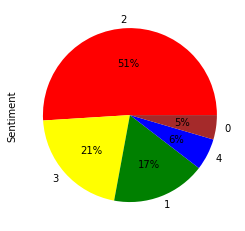

In [78]:
data.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green", "Blue", "Brown"])

In [79]:

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

In [45]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
parsed_data = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

## Divide the data into train and test in the ratio 80 and 20 respectively. ( 1 mark )

In [48]:
# text_counts would be used as x ( features ) and data["Sentiment"] as y
X = np.array(parsed_data)
y = np.array(data['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

## Train Multinomial Naive Bayes Classification model using Sklearn ( 2 marks )

In [49]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Calculate the Test Accuracy , Precision , Recall , Confusion Matrix on test data ( 4 marks, each cary 1 mark )

In [52]:
y_pred = mnb.predict(X_test)


In [55]:
print(confusion_matrix(y_test,y_pred))

[[  497   817   393    55     6]
 [  470  2851  3116   359    22]
 [  154  1880 15497  2195   169]
 [   19   321  3217  4135   540]
 [    4    26   372  1242   658]]


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.28      0.34      1768
           1       0.48      0.42      0.45      6818
           2       0.69      0.78      0.73     19895
           3       0.52      0.50      0.51      8232
           4       0.47      0.29      0.36      2302

    accuracy                           0.61     39015
   macro avg       0.52      0.45      0.48     39015
weighted avg       0.59      0.61      0.59     39015



In [57]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,497,817,393,55,6,1768
1,470,2851,3116,359,22,6818
2,154,1880,15497,2195,169,19895
3,19,321,3217,4135,540,8232
4,4,26,372,1242,658,2302
All,1144,5895,22595,7986,1395,39015


## Predict the class for the sentence : "I ate pizza last night at dominos which was very healthy and tasty" ( 2 marks )

In [82]:
input_string = "I ate pizza last night at dominos which was very healthy and tasty"
print(mnb.predict(cv.transform([input_string])))

[3]
